In [334]:
## This project looks to produce a ML model which can effectively predict if a patient is likely to be diagnosed with CVD based on their medical information and general details. 

In [335]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [336]:
## Reading in the CSV dataset and printing the first 5 rows and shape of the dataframe to ensure the read has worked correctly
heartdisease_df = pd.read_csv('/home/jovyan/heart_disease_prediction.csv')
print(heartdisease_df.shape)
print(heartdisease_df[:5])

(918, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [337]:
print(heartdisease_df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [338]:
## Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope are all categorical columns and will require pd.getdummies() replacements if selected as relevant features. FastingBS and HeartDisease are also categorical as they only hold values 0 and 1.

In [339]:
print(heartdisease_df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [340]:
## No missing datapoints in the dataframe currently

In [341]:
print(heartdisease_df.mean())
print(heartdisease_df.median())

Age              53.510893
RestingBP       132.396514
Cholesterol     198.799564
FastingBS         0.233115
MaxHR           136.809368
Oldpeak           0.887364
HeartDisease      0.553377
dtype: float64
Age              54.0
RestingBP       130.0
Cholesterol     223.0
FastingBS         0.0
MaxHR           138.0
Oldpeak           0.6
HeartDisease      1.0
dtype: float64


/tmp/ipykernel_68/1210964389.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(heartdisease_df.mean())
/tmp/ipykernel_68/1210964389.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(heartdisease_df.median())


In [342]:
## Patient average age is 53 years old but median is 54 indicating a slight skew in the data for Age (considering Age as an independent variable)

In [343]:
import matplotlib.pyplot as plt

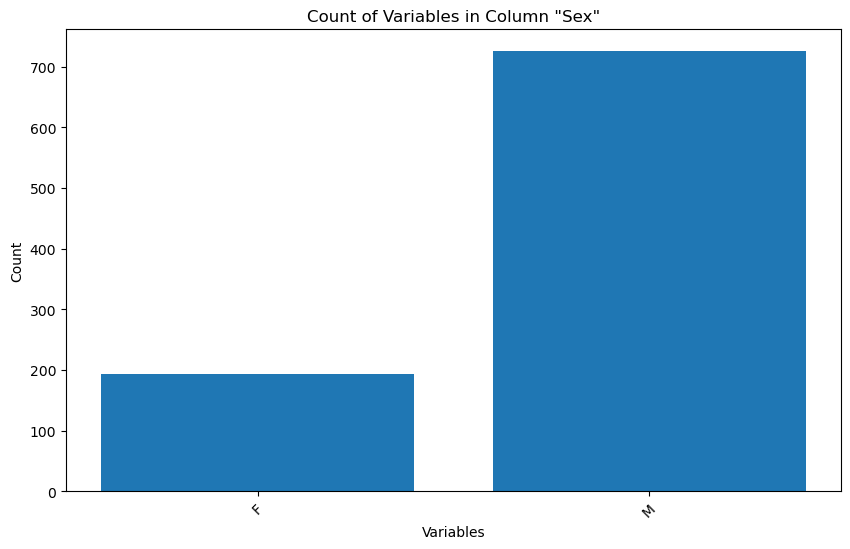

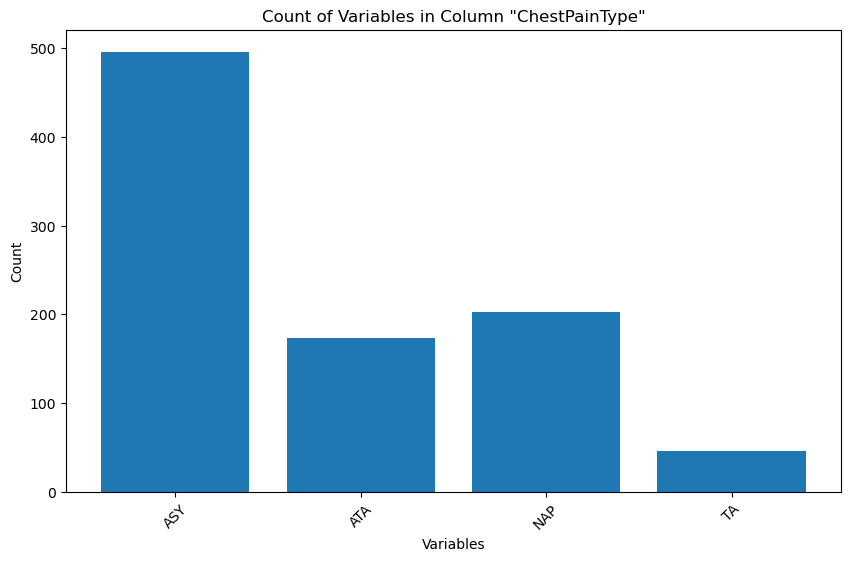

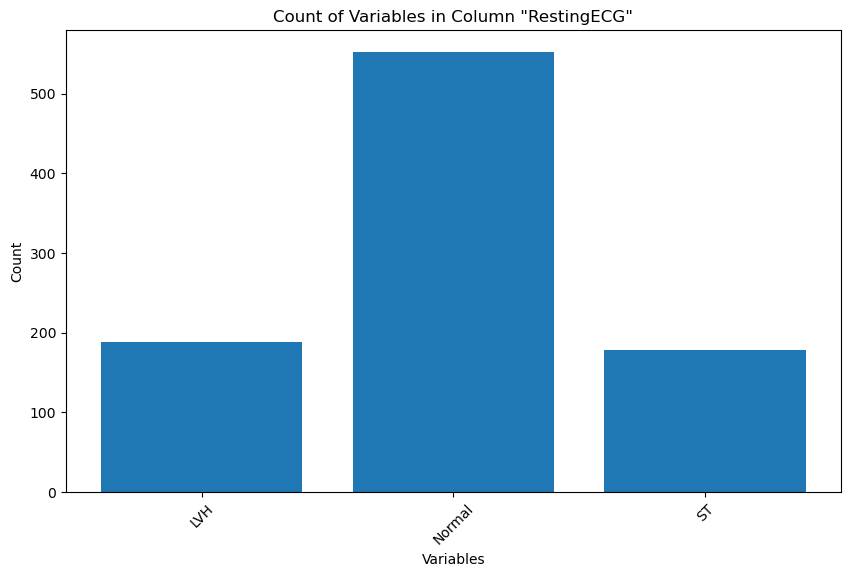

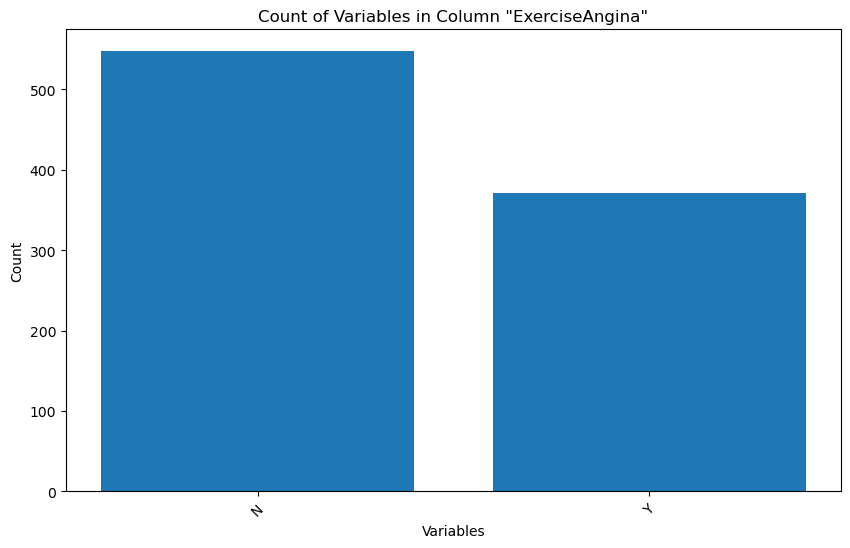

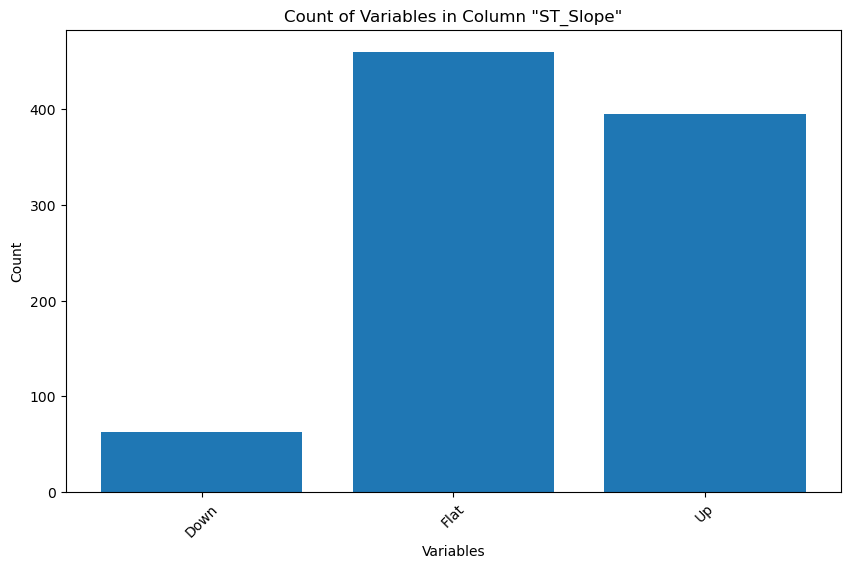

In [344]:
columns_to_count = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Use value_counts() to count the occurrences of each variable in the column
for column in columns_to_count:
    value_counts = heartdisease_df[column].value_counts()

# Sort the values by the index (the variables in the column)
    value_counts = value_counts.sort_index()

# Create a bar chart using Matplotlib
    plt.figure(figsize=(10, 6))  # Optional: Set the figure size

    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel('Variables')
    plt.ylabel('Count')
    plt.title(f'Count of Variables in Column "{column}"')
    plt.xticks(rotation=45)  # Optional: Rotate the x-axis labels for better readability
    plt.show()


In [345]:
## The above graphs demonstrate some initial insights into the data. For example, many of the patients within the dataset are Male and hence this may add some bias and hinder the models predictive accuracy. Whereas there is an even distrubtion between those who have and haven't been diagnosed with CVD. Considering bayesian inference, we want the spread to be as representative of the whole population as possible to avoid bias.

In [346]:
# Filter the dataset for patients with heart disease
heart_disease_patients = heartdisease_df[heartdisease_df['HeartDisease'] == 1]

# Calculate the percentage of heart patients with heart disease who are male and over 50 years old
male_over_50 = heart_disease_patients[(heart_disease_patients['Sex'] == 'M') & (heart_disease_patients['Age'] > 50)]
percentage_male_over_50 = (len(male_over_50) / len(heart_disease_patients)) * 100
print(f'percentage of male patients over 50 with heart disease is {percentage_male_over_50:.2f}%')

percentage of male patients over 50 with heart disease is 67.72%


In [347]:
RestingBP0=(heartdisease_df[heartdisease_df['RestingBP']==0])
print(len(RestingBP0))

1


In [348]:
## the number of patients that have a resting blood pressure of 0 is 1, this is an outlier and a likely error


In [349]:
Cholesterol0=(heartdisease_df[heartdisease_df['Cholesterol']==0])
print(len(Cholesterol0))

172


In [350]:
lenchol0 = len(heartdisease_df[heartdisease_df['Cholesterol']==0])
lenBP0 = len(heartdisease_df[heartdisease_df['RestingBP']==0])
print(f'The number of patients with a cholesterol reading of 0 is {lenchol0:.2f}')

The number of patients with a cholesterol reading of 0 is 172.00


In [351]:
## Because there is a large number of patietns with a cholesterol reading of 0, these will have their values replaced with the median in order to not dismiss too much data.
        
        

In [352]:
medianchol = heartdisease_df['Cholesterol'].median

In [353]:
heartdisease_df['Cholesterol'] = heartdisease_df['Cholesterol'].replace(0, medianchol)

In [354]:
## next we will find which of our 5 selected features are categorical and convert these into numerical columns in order to allow to the model to determine close proximity

In [355]:
heartdisease_df = heartdisease_df[['Age','Sex','ChestPainType','Cholesterol','FastingBS', 'HeartDisease']]

In [356]:
heartdisease_df = pd.get_dummies(data=heartdisease_df, columns=['Sex','ChestPainType'], drop_first = True)

In [357]:
import seaborn as sns

In [358]:
correlation_matrix = heartdisease_df.corr()
print(heartdisease_df.columns.tolist())

['Age', 'Cholesterol', 'FastingBS', 'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA']


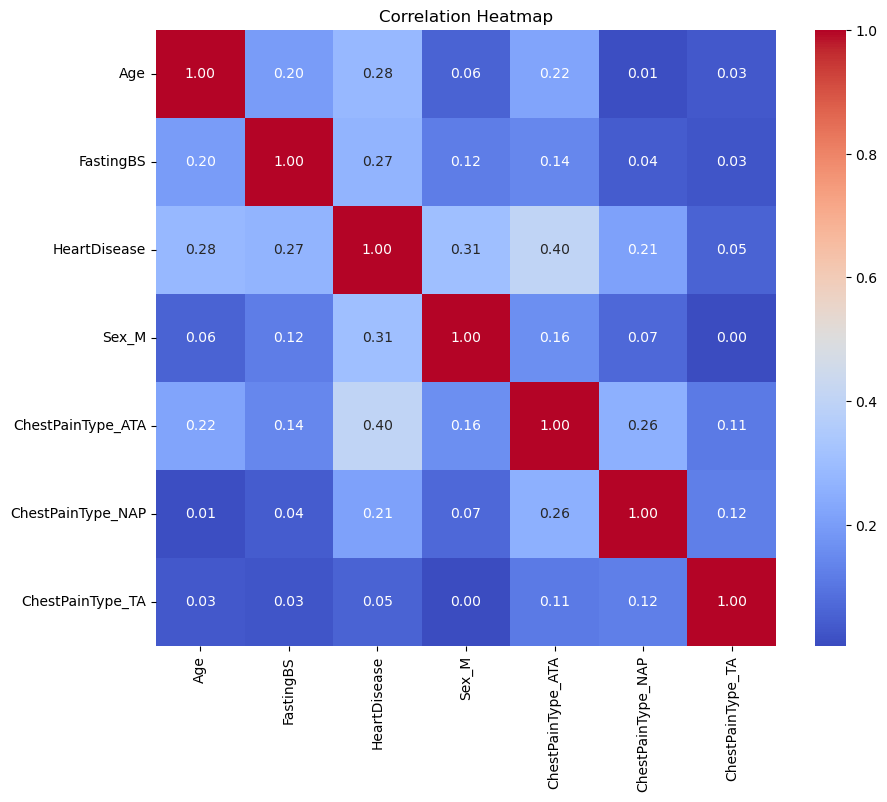

In [359]:
correlation_matrix = abs(heartdisease_df.corr()) ## take the modulus of the matrix to ensure storng inverse correlations are represented colour-wise the same as strong positive correlations

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Optional: Add a title
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

In [360]:
## sort values in correlation_matrix['HeartDisease'] to determine which features are mostl greatly correlated



In [361]:
correlations_with_target = correlation_matrix['HeartDisease'].abs().sort_values(ascending=False)
print(correlations_with_target)

HeartDisease         1.000000
ChestPainType_ATA    0.401924
Sex_M                0.305445
Age                  0.282039
FastingBS            0.267291
ChestPainType_NAP    0.212964
ChestPainType_TA     0.054790
Name: HeartDisease, dtype: float64


In [362]:
## once sorted the above list demonstrates that being Male and presenting Atypical Angina chest pain are most significantly correlated with likelihood of HeartDisease

In [363]:
## based on the above findings we will only move forward with ChestPainType_ATA, Sex_M, Age, and FastingBS as features factored into the model in order to save on computational cost with minimal accuracy drop-off

In [364]:
heartdisease_df = heartdisease_df[['ChestPainType_ATA','Sex_M','Age','FastingBS','HeartDisease']]

In [365]:
print(heartdisease_df)

     ChestPainType_ATA  Sex_M  Age  FastingBS  HeartDisease
0                    1      1   40          0             0
1                    0      0   49          0             1
2                    1      1   37          0             0
3                    0      0   48          0             1
4                    0      1   54          0             0
..                 ...    ...  ...        ...           ...
913                  0      1   45          0             1
914                  0      1   68          1             1
915                  0      1   57          0             1
916                  1      0   57          0             1
917                  0      1   38          0             0

[918 rows x 5 columns]


In [366]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [367]:
## the next step splits the dataframe into a training set, validation set, and a test set. The training set wil allow us to fit the mode and the validation set allows for backtesting the model and allow for opportunity to perform any tuning of hyperparameters.

In [368]:
X = heartdisease_df.drop(['HeartDisease'],axis=1)
y = heartdisease_df['HeartDisease']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state = 500)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.25, random_state=500)

In [369]:
featurelist = (heartdisease_df.drop(['HeartDisease'],axis=1)).columns.tolist()
print(featurelist)

['ChestPainType_ATA', 'Sex_M', 'Age', 'FastingBS']


In [370]:
for feature in featurelist:
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train[[feature]],y_train)
    accuracy = knn.score(X_val[[feature]], y_val)
    print(f'The accuracy using the {feature} feature was {accuracy*100:.2f}%')

The accuracy using the ChestPainType_ATA feature was 70.11%
The accuracy using the Sex_M feature was 65.22%
The accuracy using the Age feature was 54.35%
The accuracy using the FastingBS feature was 57.07%


In [371]:
## the above for loop  demonstrates which of the selected features best predicted HeartDisease, this is also proportional to the Pearson's corrlation matrix previously generated. We will now look to incorporate all features and optimise the hyperparameters of the model including the number of nearest neighbours and the weighting of distance. All features will be scaled between 0 and 1 to homogenise spreads and allow for equal weighting

In [372]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [373]:
X_train_scaled = scaler.fit_transform(X_train[['ChestPainType_ATA', 'Sex_M', 'Age', 'FastingBS']])

X_val_scaled = scaler.transform(X_val[['ChestPainType_ATA', 'Sex_M', 'Age', 'FastingBS']])

In [374]:
multiknn = KNeighborsClassifier()
multiknn.fit(X_train_scaled,y_train)
modelaccuracy = (multiknn.score(X_val_scaled, y_val)*100)
print(f'The accuracy of the K-NN model with no hyperparameter tuning is {modelaccuracy:.2f}%')

The accuracy of the K-NN model with no hyperparameter tuning is 70.65%


In [375]:
## The above backtesting results using our validation set demonstrates a predictive score of 70.65%. Exploring the true/false postivies and negatives here may give further insight into the potential issues with the model and unrecognised biases within our training dataset. Now lets optimise the hyperparameter to try and improve predictive performance.

In [376]:
knn=KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,50,1)),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree']}
## this dictionary possesses all the variables within the hyperparameter library that we would like to test.

In [377]:
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid, scoring='accuracy')
knn_grid.fit(X_val_scaled, y_val)
print(f"The optimal hyperparameters to use for the best predictive performance according to our training set are {knn_grid.best_params_} and the optimal model's predictive score is {knn_grid.best_score_*100}%")


The optimal hyperparameters to use for the best predictive performance according to our training set are {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'} and the optimal model's predictive score is 75.55555555555556%


In [378]:
## the above hyperparameter tuning inidcates that our model performs best when using the 20 nearest neighbors when backtesting against training set. The distance between the test point and each of the nearest neighbors is inversely weighted to its proximity (i.e. Euclidean). We will now assess the final performance of the model on our test set and determine its quality.

In [379]:
knn = KNeighborsClassifier(algorithm= 'auto', metric= 'euclidean', n_neighbors= 20, weights= 'uniform')

In [380]:
X_test_scaled = scaler.fit_transform(X_test[['ChestPainType_ATA', 'Sex_M', 'Age','FastingBS']])

In [381]:
knn.fit(X_train_scaled,y_train)
accuracy = knn.score(X_test_scaled,y_test)
print(f"The optimised model's predictive accuracy when backesting using the test set is {accuracy*100:.2f}%")

The optimised model's predictive accuracy when backesting using the test set is 71.74%


In [382]:
## To conclude, the predictive accuracy of the model is 5% worse when backtesting using the test set instead of the validation set. This may mean thei ether the validtion or test set were not sufficient in size to be truly representative. We may need to experiment with test splits to see if these can be better aligned and overall improve the reliability of the model. Given the real world applications for this model I would not recommend its use currently in determining presentation of Heart disease in a given patient. We should look to furter optimise the model and perhaps hunt further for relevant high-correlating features which can act as better predictors of the target outcome. Frthermore, there is a wider range of hyperparameters we can explore for tuning.